# Burgers or Pizza

Using the dataset (https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv)  

In [247]:
#load libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math as math
from plotnine import *

%matplotlib inline


from sklearn.linear_model import LogisticRegression
#Z-score variables
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
# simple TT split cv
from sklearn.model_selection import train_test_split 
#k-fold cv
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut

from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [248]:
#1
bp = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv")

In [249]:
#Removed missing values that were less than 30% of the data
bp = bp.dropna(subset=['Sugar_100g', 'Trans_Fat_100g', 'Dietary_Fiber_100g'])

In [250]:
# MODEL 1: Logistic regression 
np.random.seed(100)
#Predictors 
predictors = ["Calories", "Total_Fat_100g", "Saturated_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", 'Sugar_100g', 'Trans_Fat_100g', 'Dietary_Fiber_100g']
X = bp[predictors]
Y = bp["Food_Category"]
# Leave One OUT
loo = LeaveOneOut()

#Logistic Regression model
logit =LogisticRegression()

# empty list to store accuracy, predicted outcome, true values 

acc = []
predicted_Outcome = []
true_value = []

#Logistic Regression model
logit =LogisticRegression()

# empty list to store accuracy, predicted outcome, true values 
acc = []

predicted_Outcome = []
true_value = []
for train, test in loo.split(X):
    # Get train/test for this fold 
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    Y_train = Y.iloc[train]
    Y_test = Y.iloc[test]
    
    # Fit Zscore only on training data (no data leakage)
    zscore = StandardScaler()
    zscore.fit(X_train)

    #Zscore both train / test
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)

    # Fit model
    model1 = logit.fit(Xz_train,Y_train)
    
    #record accuracy
    acc.append(accuracy_score(Y_test, model1.predict(Xz_test)))
    
    #record actual value 
    true_value.append(Y_test)
    #record predictors 
    predicted_Outcome.append(model1.predict(X_test)[0])
    

In [251]:
#Calculate the average accuracy of the model
print(np.mean(acc))

0.9641618497109826


In [252]:
#Choose max_depth using Grid Search

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

# create model
tree_hyp = DecisionTreeClassifier()
model_hyp = tree.fit(Xz_train,Y_train)
# choose potential values of k
dep = {"max_depth": range(1,30)}

# use grid search to find best parameters
grid = GridSearchCV(model_hyp,dep, scoring = "accuracy", cv = 5)

knnmod = grid.fit(X_train, y_train)

In [253]:
knnmod.best_estimator_.get_params()["max_depth"]

15

In [254]:
# MODEL 2: Decision Tree
# Leave One OUT
np.random.seed(100)
loo = LeaveOneOut()
acc2 = []
acc_train = []
predicted_Outcome2 = []

#Hyper parameter tuning 
for train, test in loo.split(X):
  # Get train/test for this fold 
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    Y_train = Y.iloc[train]
    Y_test = Y.iloc[test]
    
    # Fit Zscore only on training data (no data leakage)
    zscore = StandardScaler()
    zscore.fit(X_train)

    #Zscore both train / test
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    for d in poss_d:
        # Fit model
        tree = DecisionTreeClassifier(max_depth = 6)
        model2 = tree.fit(Xz_train,Y_train)
    #record accuracy
    acc2.append(accuracy_score(Y_test, model2.predict(Xz_test)))
    acc_train.append(accuracy_score(Y_train, model2.predict(Xz_train)))
    #record actual value 
    true_value.append(Y_test)
    #record depth
    depth.append(tree.get_depth())
    #record predictors 
    predicted_Outcome2.append(model1.predict(Xz_test)[0]) 

In [255]:
print(np.mean(acc2))

0.953757225433526


#### a) explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)
While some of the possible algorithms included K-nearest neighbors or Naive Bayes Algorithm, I felt a logistic regression and decision tree were the most appropriate algorithms to build these model. I chose not to do K-nearest neighbors because this algorithm assumes that the data points that are close together in the feature space have the same category. I also chose not to do the Naive Bayes Algorithm because it looks at the probability that the data point is in a certain category which would be difficult to do with all of the continuous variables in the dataset. 

For the decision tree model, I did parameter tuning using the Grid Search method to determine what the best max_depth for model. To ensure that the model isn't overfit on the training data (model does not predict unseen data as well as the data it is built on), I used Grid Search because it tests every possible max_depth value and returns the model that is trained with the best paramter model it could find. The Grid Search returned 6 as the best max_depth which is what I used when creating my model. 

#### b) explain which variables you chose to include and why (you must use the same predictors for both models)

I chose to use the continuous variables "Calories", "Total_Fat_100g", "Saturated_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", as my predictors because I didn't see any unusual patterns when looking at each individual predictors relationship to "Food_Category" which is what we are trying to predict. I also chose to include the variables "Sugar_100g", "Trans_Fat_100g", and "Dietary_Fiber_100g" after removing the missing values in these categories. I removed these missing values because the number of missing values were under 30% of the dataset and wouldn't heavily impact the amount of data we have to train and test the models. I chose to use the variables with "_100g" at the end (represents the amount of that nutrient per 100 grams of the food) instead of the regular "Total_Fat" or "Sugar" because it standardizes those variables to be measured on the same scale. I chose to leave out the continuous variable "Potassium_100g" because it missing values for almost the entire data set. I also chose to leave out "Item_Description" and "Item_Name" because each row item had a different name and description. 
#### c) explain whether or not you decided to z-score your variables and why.
I chose to z-score my variables because while the variables ending in "_100g" are all on the same scale, calories isn't on that scale. Therefore, to make sure all the variables are on the same scale I chose to still z-score my variables because zscoring esentially subtratcs the mean from each data point and takes that new subtracted score and divide it by the standard deviation because standard deviation represents the typical amount that a point varies from the mean. 
#### d) choose ONE method of model validation, and explain why ( you must use the same method for both models; also, your reason must be based on aspects of the data and/or computational time/efficiency, and not on your lack of familiarity with the different methods).
I chose to do Leave-one-out cross-validation because it should provide the most accuracy of how well the models are able to predict if the item is a burger or pizza with the given predictor variables. This method provides the most accuracy because it is using the whole data set and using each data point as the test variable once while the rest of the data points are used to train the model. While LOO can be computationally expensive and take more time to compute, I chose to use LOO as my validaton method because I had a fairly reasonable sized data set and enough time to work on it.
#### e) explain how your model performed, and what metric you used to decide that.

Both models performed very well. I measured the model performance by looking at the average accuracy score produced with k-fold cross validation which looks at how accurately the model predicts if the item is a burger or piza. The logistic regression model  had an average accuracy score of 96.416% which means it predicted that a product was a burger or pizza correctly 96.416% of the time. The decision tree performed slightly worse with an average accuracy score of 95.375%. 
#### f) compare the models: did one model do better than the other? Why do you think that was?
Based off of the accuracy score, the logistic regression model did slightly better than decision tree model because the logistic regression model had an average accuracy score of 96.416% while the decision tree had an average accuracy score of 95.375%. 
#### g) use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.

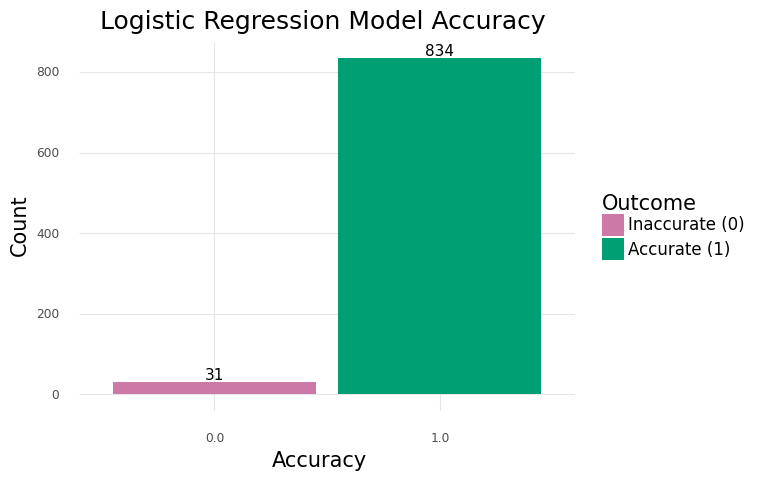

<ggplot: (8784773847969)>

In [256]:
acc_df = pd.DataFrame(acc)
(ggplot(acc_df, aes(x = "factor(acc)", fill = "factor(acc)")) 
 + geom_bar() 
 + ggtitle(" Logistic Regression Model Accuracy")
 + labs(x = "Accuracy", y = "Count")
 + theme_minimal()
 + theme(panel_grid_minor_y =element_blank(),
        panel_grid_minor_x =element_blank(),
        axis_title = element_text(size =15),
        strip_text_x = element_text(size =15),
        plot_title = element_text(size =18),
        legend_title = element_text(size = 15),
        legend_text = element_text(size = 12))
 +scale_fill_manual(values = ["#cc79a7", "#009e73"],name ="Outcome", 
                    labels = ("Inaccurate (0)", "Accurate (1)"))
+ geom_text(aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'))

Caption: This bar chart shows the amount of times the logistic regression model correctly and incorrectly predicted if the item was pizza or a burger, further supporting the accuracy score generated by the accuracy function discussed in part e. The logistic regression model correctly predicted if a item was pizza or a burger 834 out of 865 times and was incorrect 31 out of 865 times. 

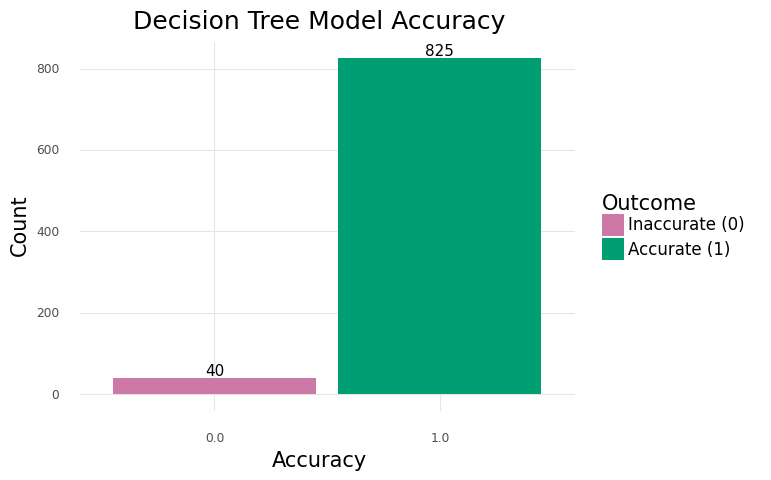

<ggplot: (8784773453041)>

In [257]:
acc2_df = pd.DataFrame(acc2)
(ggplot(acc2_df, aes(x = "factor(acc2)", fill = "factor(acc2)")) 
 + geom_bar() 
 + ggtitle("Decision Tree Model Accuracy")
 + labs(x = "Accuracy", y = "Count")
 + theme_minimal()
 + theme(panel_grid_minor_y =element_blank(),
        panel_grid_minor_x =element_blank(),
        axis_title = element_text(size =15),
        strip_text_x = element_text(size =15),
        plot_title = element_text(size =18),
        legend_title = element_text(size = 15),
        legend_text = element_text(size = 12))
 +scale_fill_manual(values = ["#cc79a7", "#009e73"],name ="Outcome", 
                    labels = ("Inaccurate (0)", "Accurate (1)"))
 + geom_text(aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'))